<a href="https://colab.research.google.com/github/pastoril10/RecomendacaoNetflix/blob/main/RecomendacaoNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando algumas bibliotecas

In [ ]:
import pandas as pd
import warnings
import plotly as py

#Carregando os dados



In [ ]:

df = pd.read_csv("netflix_titles.csv")

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Pré Processamento de dados

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## Existem dados faltantes? Sim!!!

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Percentual de dados faltantes.

In [ ]:
# limitar a duas casas decimais
round((df.isnull().sum()/len(df))*100, 2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

## Tratando os dados da coluna "Rating"

Classificação (rating)

TV-Y
(Conteúdo infantil)

TV-Y7
(Não recomendado para menores de 7 anos)

TV-Y7-FV
(Não recomendado para menores de 7 anos com violência fantasiosa)

TV-G
(Recomendado para todos os públicos)

TV-PG
(Classificação destinada com a orientação parental)

TV-14
(Não recomendado para menores de 14 anos)

TV-MA
(Audiência madura — não recomendado para menores de 17 anos)

UR
(Conteúdo sem classificação)

R
(Restrito)

NR
(Não recomendado)

In [ ]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#Adicionando a classificação  correta (classificação livre - TV-G)
df.rating.iloc[5541] = "TV-G"
df.rating.iloc[5794] = "TV-G"
df.rating.iloc[5813] = "TV-G"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.rating.fillna("TV-G", inplace=True)

## Tratando os dados da coluna duração

In [ ]:
#Verificando os titles que estão sem o tempo de duração
df[df.duration.isnull() == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,TV-G,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,TV-G,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,TV-G,NaN,Movies,The comic puts his trademark hilarious/thought...


Adicionando a duração correta. As informações sobre duração para os 3 movies foram adicionados na coluna "rating"

In [ ]:
#Adicionando a duração correta. 
df.duration.iloc[5541] = "74 min"
df.duration.iloc[5794] = "84 min"
df.duration.iloc[5813] = "66 min"


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Datas de estreia faltantes que foram encontradas na internet para preencher NaN
df.date_added.iloc[6066] = "November 21, 2021"
df.date_added.iloc[6174] = "June 1, 2021"
df.date_added.iloc[6174] = "June 1, 2021"
df.date_added.iloc[6795] = "Novembar 19, 2021"
df.date_added.iloc[6806] = "July 29, 2021"
df.date_added.iloc[6901] = "November 30, 2015"
df.date_added.iloc[7196] = "October 21, 2021"
df.date_added.iloc[7254] = "Novembar 19, 2021"
df.date_added.iloc[7406] = "August 9, 2019"
df.date_added.iloc[7847] = "January 10, 2020"
df.date_added.iloc[8182] = "November 21, 2021"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.isnull().sum() 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

Vamos analisar as colunas director e cast

Devido a alta quantidade de dados faltantes na coluna director e cast, será removido. O preenchimento dos valores nulos se tornam inviáveis. Essas informações necessitam de extração de dados de outro dataset que contenha o nome dos diretores e atores dos respectivos filmes.

In [ ]:
df.drop(columns=["director", "cast"], inplace=True)

Vamos analisar a coluna Country

Ao observar o percentual de (9,44%) dos valores faltantes, será removido  todos os registros faltantes da coluna contry

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.shape

(7976, 10)

In [ ]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [ ]:

df_novo = df.date_added
df_novo = pd.DataFrame(df_novo)
df_novo.shape

(7976, 1)

In [ ]:
#Separando o ano de lançamento na netflix
df_novo = df_novo['date_added'].str.split(", ", expand=True)
df_novo.shape

(7976, 2)

In [ ]:
df_novo.rename(columns={1:"ano_lancamento"}, inplace=True)
df_novo.drop(columns=0, inplace=True)

df_novo.shape

(7976, 1)

In [ ]:
df = pd.concat([df,df_novo], axis=1)
df.shape

(7976, 11)

In [ ]:
df.isnull().sum()

show_id           0
type              0
title             0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
ano_lancamento    0
dtype: int64

In [ ]:
df["ano_lancamento"] = df["ano_lancamento"].astype(int)

# Explorando os dados

### Percentual de filmes e TV Shows (séries)

In [ ]:
#importando biblioteca
import plotly.graph_objs as go

In [ ]:
values= df["type"].value_counts()
values

Movie      5691
TV Show    2285
Name: type, dtype: int64

In [ ]:
labels= ["Filmes","TV Shows"]
labels

['Filmes', 'TV Shows']

In [ ]:
figura = go.Figure(data=[go.Pie(labels=labels,
                                 values=values,
                                 textinfo = "label+percent",
                                 marker_colors = ["blue","#FBDD7E"]
                                )])

figura.update_layout(height=600, 
                  width=800, 
                  title_text="Percentual de Filmes e TV Shows(séries)")


figura.show()

Após identificar o percentual refente aos Filmes (70,8%) e TV Shows (29,2%) no dataset. Foi então observado a quantidade de Filmes e TV Shows que foram lançados na plataforma da Netflix no mesmo ano que foi lançamento do Filme/TV Shows no cinema.

### As palavras mais populares na descrição dos filmes na Netflix são:



As palavras mais populares na descrição dos filmes na Netflix são:

life (vida)

find (encontrar)

family (familia)

new (novo)

friend (amigos)

become (se tornar)


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


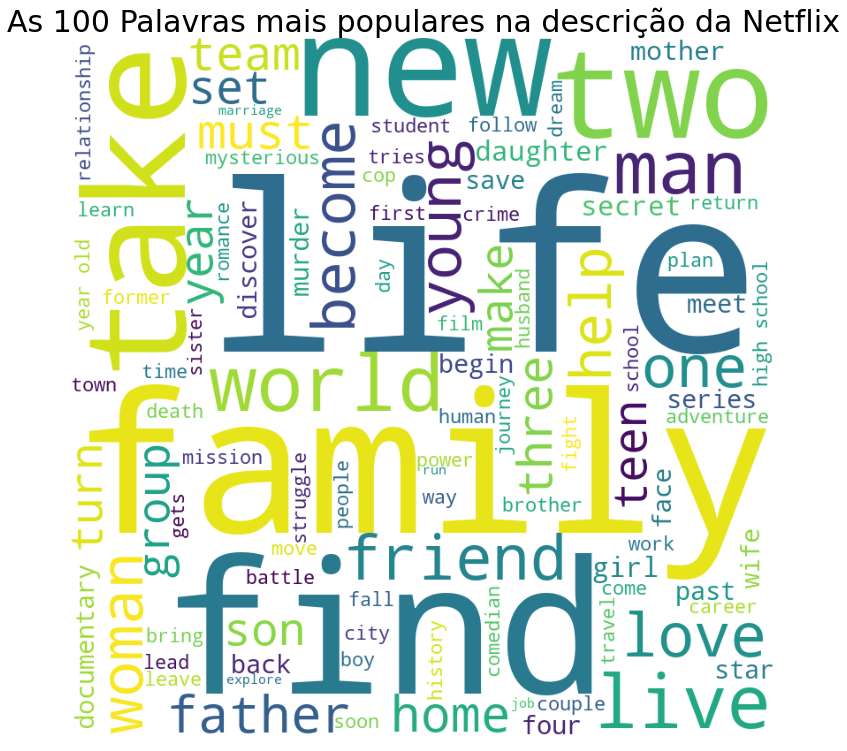

In [ ]:
plt.rcParams["figure.figsize"] = (13,13)

wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=800, max_words=100).generate(" ".join(df["description"]))


plt.axis("off")
plt.title("As 100 Palavras mais populares na descrição da Netflix", fontsize = 30)


plt.imshow(wordcloud)
#Salvando figura
plt.savefig('teste.png', format='png', dpi=1200)

### Quantidade de Filmes e TV Show adicionados a cada ano

In [ ]:
df_anos_movie = df[df["type"] == "Movie"]
df_anos_tv_shows = df[df["type"] == "TV Show"]
df_anos_tv_shows.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,ano_lancamento
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021
15,s16,TV Show,Dear White People,United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,2021
17,s18,TV Show,Falsa identidad,Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,2021


In [ ]:
df_anos_tv_shows["ano_lancamento"].value_counts()

2020    549
2019    510
2021    376
2018    338
2017    309
2016    166
2015     26
2013      5
2014      5
2008      1
Name: ano_lancamento, dtype: int64

In [ ]:
figura = go.Figure()

cor_movie = ["red"]*len(df_anos_movie["ano_lancamento"].unique())
lista_contagem_movie = list(df_anos_movie["ano_lancamento"].value_counts())
indice_movie = lista_contagem_movie.index(max(lista_contagem_movie))
cor_movie[indice_movie] = "#f34336"

cor_tv = ["blue"]*len(df_anos_tv_shows["ano_lancamento"].unique())
lista_contagem_tv = list(df_anos_tv_shows["ano_lancamento"].value_counts())
indice_tv = lista_contagem_tv.index(max(lista_contagem_tv))
cor_tv[indice_tv] = "#00fff7"

ano_tv = list(df_anos_tv_shows["ano_lancamento"].unique())
ano_movie = list(df_anos_movie["ano_lancamento"].unique())


figura.add_trace(go.Bar(x=df_anos_movie["ano_lancamento"].unique(),
                y=df_anos_movie["ano_lancamento"].value_counts(),
                name='Filmes',
                marker_color=cor_movie
                ))

figura.add_trace(go.Bar(x=df_anos_tv_shows["ano_lancamento"].unique(),
                y=df_anos_tv_shows["ano_lancamento"].value_counts(),
                name='TV Shows',
                marker_color=cor_tv
                ))

figura.add_annotation(x=ano_movie[indice_movie], y=max(lista_contagem_movie),
            text="Maior entrada de Filmes",
            showarrow=True,
            arrowhead=1,
            font=dict(
               family="Courier New, monospace",
               size=16,
               color="#222A2A")
            )

figura.add_annotation(x=ano_tv[indice_tv], y=max(lista_contagem_tv),
            text="Maior entrada de TV Shows",
            showarrow=True,
            arrowhead=1,
            font=dict(
               family="Courier New, monospace",
               size=16,
               color="#222A2A")
            )


figura.update_layout(
    title='Quantidade de Filmes e TV Show adicionados a cada ano',
    xaxis_tickfont_size=14,
    xaxis=dict(
        title = "Ano de lançamento na Netflix",
        titlefont_size=16,
        tickfont_size=14),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

figura.show()
#Salvando figura
plt.savefig('QtdeFilmeETVS.png', format='png', dpi=1200)

<Figure size 936x936 with 0 Axes>

### Classificação para os filmes e tv shows ques estreiaram no mesmo ano de lançamento

In [ ]:
df_estreia_igual_filme = df_anos_movie[df_anos_movie["ano_lancamento"] == df_anos_movie["release_year"]].sort_index()
df_diferente_igual_filme = df_anos_movie[df_anos_movie["ano_lancamento"] != df_anos_movie["release_year"]].sort_index()


df_estreia_igual_TV = df_anos_tv_shows[df_anos_tv_shows["ano_lancamento"] == df_anos_tv_shows["release_year"]].sort_index()
df_diferente_igual_TV = df_anos_tv_shows[df_anos_tv_shows["ano_lancamento"] != df_anos_tv_shows["release_year"]].sort_index()

percentual_movie = (len(df_estreia_igual_filme)/len(df_anos_movie))*100
percentual_tv = (len(df_estreia_igual_TV)/len(df_anos_tv_shows))*100


In [ ]:
from plotly.subplots import make_subplots

figura = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=['Filmes', 'TV Shows'])


values = df["type"].value_counts()
labels = ["Confirmados", "Não Confirmados"]

figura.add_trace(go.Pie(values=[percentual_movie, 100 - percentual_movie], 
                        textinfo = "label+percent",
                        labels = labels,
                        marker_colors = ["rgb(228,26,28)","rgb(102,102,102)"]),
                        row = 1,
                        col = 1)

figura.add_trace(go.Pie(values=[percentual_tv, 100 - percentual_tv], 
                        textinfo = "label+percent",
                        labels = labels,
                        marker_colors = ["blue","rgb(102,102,102)"]),
                        row = 1,
                        col = 2)

figura.update_layout(height = 600,
                     width = 800,
                     title_text = "Percentual de Filmes e TV Shows lançados no mesmo ano de estreia")

figura.show()


In [ ]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,ano_lancamento
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021


In [ ]:
len(df_estreia_igual_TV[df_estreia_igual_TV["rating"] == "TV-14"])

258

In [ ]:
len(df_estreia_igual_TV[df_estreia_igual_TV["rating"]=="TV-14"])

258

In [ ]:
figura = make_subplots(rows=2, cols=1, subplot_titles=["Filmes","TV Shows"])

color_movie = ["red"]*len(df_anos_movie["ano_lancamento"].unique())
lista_movie = ["TV-MA","TV-14","TV-PG","R","NR","PG-13","PG","TV-Y7","TV-G","TV-Y","G","TV-Y7-FV","UR"]

color_tv = ["blue"]*len(df_anos_tv_shows["ano_lancamento"].unique())
lista_tv_shows = ["TV-MA","TV-14","TV-PG","TV-Y7","TV-Y","TV-Y7-FV","TV-G","NR","R"]

#subplots 1 e 2
figura.add_trace(go.Bar(x=lista_movie,
                y=df_estreia_igual_filme["rating"].value_counts(),
                name='Filmes',
                marker_color=color_movie
                ),row=1,col=1)

figura.add_trace(go.Bar(x=lista_tv_shows,
                y=df_estreia_igual_TV["rating"].value_counts(),
                name='TV Shows',
                marker_color=color_tv
                ),row=2,col=1)


# Percentual de classificação dos filmes mais disponibilizados
per_filme_tv_14 = round(len(df_estreia_igual_filme[df_estreia_igual_filme["rating"]=="TV-14"])*100/(len(df_estreia_igual_filme)),2)
per_filme_tv_pg = round(len(df_estreia_igual_filme[df_estreia_igual_filme["rating"]=="TV-PG"])*100/(len(df_estreia_igual_filme)),2)
per_filme_tv_ma = round(len(df_estreia_igual_filme[df_estreia_igual_filme["rating"]=="TV-MA"])*100/(len(df_estreia_igual_filme)),2)

# Percentual de classificação das séries mais disponibilizados
per_tv_show_tv_14 = round(len(df_estreia_igual_TV[df_estreia_igual_TV["rating"]=="TV-14"])*100/(len(df_estreia_igual_TV)),2)
per_tv_show_tv_pg = round(len(df_estreia_igual_TV[df_estreia_igual_TV["rating"]=="TV-PG"])*100/(len(df_estreia_igual_TV)),2)
per_tv_show_tv_ma = round(len(df_estreia_igual_TV[df_estreia_igual_TV["rating"]=="TV-MA"])*100/(len(df_estreia_igual_TV)),2)



figura.update_layout(
    title='Classificação para os filmes e tv shows ques estreiaram no mesmo ano de lançamento',
    xaxis_tickfont_size=14,
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1, # gap between bars of the same location coordinate.
    height=700, width=800)

figura.show()

### Paises com maior distribuição de Filmes e TV Shows (mapa)


In [ ]:
df_paises = df.country
df_paises = pd.DataFrame(df_paises)
df_paises.shape

(7976, 1)

In [ ]:
#Separando o ano de lançamento na netflix
df_paises = df_paises['country'].str.split(",", expand=True)

In [ ]:
df_paises.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
4,India,None,None,None,None,None,None,None,None,None,None,None
7,United States,Ghana,Burkina Faso,United Kingdom,Germany,Ethiopia,None,None,None,None,None,None
8,United Kingdom,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_paises.rename(columns={0:"paises"}, inplace=True)
df_paises.drop(columns= [1,2,3,4,5,6,7,8,9,10,11], inplace=True)

In [ ]:
df_paises.paises.unique()

array(['United States', 'South Africa', 'India', 'United Kingdom',
       'Germany', 'Mexico', 'Turkey', 'Australia', 'Finland', 'China',
       'Nigeria', 'Japan', 'Spain', 'France', 'Belgium', 'South Korea',
       'Argentina', 'Russia', 'Canada', 'Hong Kong', 'Italy', '',
       'Ireland', 'New Zealand', 'Jordan', 'Colombia', 'Switzerland',
       'Israel', 'Brazil', 'Taiwan', 'Bulgaria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Kuwait', 'Malaysia', 'Vietnam',
       'Sweden', 'Lebanon', 'Romania', 'Philippines', 'Iceland',
       'Denmark', 'United Arab Emirates', 'Netherlands', 'Norway',
       'Syria', 'Mauritius', 'Austria', 'Czech Republic', 'Cameroon',
       'Uruguay', 'Kenya', 'Chile', 'Luxembourg', 'Bangladesh',
       'Portugal', 'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe',
       'Puerto Rico', 'Pakistan', 'Cyprus', 'Paraguay', 'Croatia',
       'Cambodia', 'Georgia', 'Sovie

In [ ]:
df_paises.paises = df_paises.paises.str.lower()
contagem = df_paises.paises.value_counts()
df_contagem = pd.DataFrame(contagem)
df_contagem

,paises
united states,3211
india,1008
united kingdom,628
canada,271
japan,259
...,...
soviet union,1
syria,1
cyprus,1
greece,1


In [ ]:
df_contagem.reset_index(inplace=True)
df_contagem.rename(columns=({"index":"paises","paises":"contagem"}), inplace=True)
df_contagem

,paises,contagem
0,united states,3211
1,india,1008
2,united kingdom,628
3,canada,271
4,japan,259
...,...,...
81,soviet union,1
82,syria,1
83,cyprus,1
84,greece,1


In [ ]:
cod_paises = {
  'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}


In [ ]:
print(cod_paises["libya"])

LBY


In [ ]:
abreviacao = []
for x in df_contagem["paises"]:
  if x in cod_paises:
    abrev = cod_paises[x]
    abreviacao.append(abrev)

  else:
    abreviacao.append(None)
df_contagem["abreviacao"] = abreviacao

In [ ]:
df_contagem.dropna(inplace=True)

In [ ]:
df_contagem.reset_index(drop=True)

,paises,contagem,abreviacao
0,united states,3211,USA
1,india,1008,IND
2,united kingdom,628,GBR
3,canada,271,CAN
4,japan,259,JPN
...,...,...,...
78,namibia,1,NAM
79,syria,1,SYR
80,cyprus,1,CYP
81,greece,1,GRC


In [ ]:
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
figura = px.scatter_geo(df_contagem, locations= df_contagem["abreviacao"], 
                        color= "contagem",
                        hover_name= df_contagem.paises.unique(),
                        size= df_contagem["contagem"],
                        projection= "natural earth")

figura.update_geos(showcountries=True,
                   showocean=True, oceancolor="LightBlue",
                   countrycolor="RebeccaPurple")
figura.update_layout(title='Paises com maior distribuição de Filmes e TV Shows',
                     xaxis_tickfont_size=14)

figura.show()

### Os 10 paises com as maiores quantidades de filmes e tv Show

In [ ]:
top_paises = df_contagem.iloc[:10]
top_paises

,paises,contagem,abreviacao
0,united states,3211,USA
1,india,1008,IND
2,united kingdom,628,GBR
3,canada,271,CAN
4,japan,259,JPN
5,france,212,FRA
6,south korea,211,KOR
7,spain,181,ESP
8,mexico,134,MEX
9,australia,117,AUS


In [ ]:
figura = go.Figure()
figura.add_trace(go.Bar(x=top_paises["paises"],
                y=top_paises["contagem"],
                name='Filmes e TV shows',
                marker_color="rgb(228,26,28)"
                ))


figura.update_layout(
    title='Paises com as maiores quantidades de Filmes e TV Shows',
    xaxis_tickfont_size=14,
    
    #Distancia entre as barras
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1, # gap between bars of the same location coordinate.
    height=700, width=800
)


figura.show()

### Gêneros de filmes e TV shows

In [ ]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,ano_lancamento
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021


In [ ]:
df_genero_movie = df_anos_movie.listed_in
df_genero_movie.head(10)

0                                        Documentaries
7     Dramas, Independent Movies, International Movies
9                                     Comedies, Dramas
12                        Dramas, International Movies
24     Comedies, International Movies, Romantic Movies
27                                            Comedies
28                     Horror Movies, Sci-Fi & Fantasy
29                                           Thrillers
38                          Action & Adventure, Dramas
41          Action & Adventure, Classic Movies, Dramas
Name: listed_in, dtype: object

In [ ]:
#Separando os generos
df_genero = df_anos_movie.listed_in.str.split(",", expand=True)

In [ ]:
df_genero.head()

,0,1,2
0,Documentaries,None,None
7,Dramas,Independent Movies,International Movies
9,Comedies,Dramas,None
12,Dramas,International Movies,None
24,Comedies,International Movies,Romantic Movies


In [ ]:
df_genero_1 = df_genero[0]
df_genero_2 = df_genero[1]
df_genero_3 = df_genero[2]
df_genero = pd.concat([df_genero_1, df_genero_2, df_genero_3])

df_genero.dropna(inplace = True)
df_genero.head()

0     Documentaries
7            Dramas
9          Comedies
12           Dramas
24         Comedies
dtype: object

In [ ]:
df_genero_movie = df_genero.value_counts()
df_genero_movie = pd.DataFrame(df_genero_movie)

In [ ]:
df_genero_movie.reset_index(inplace=True)

In [ ]:
df_genero_movie.rename(columns={"index":"genero", 0:"contagem"}, inplace=True)
df_genero_movie.shape


(37, 2)

In [ ]:
#Separando os generos dos tv shows
df_genero_TV = df_anos_tv_shows.listed_in.str.split(",", expand=True)
df_genero_TV.head()

,0,1,2
1,International TV Shows,TV Dramas,TV Mysteries
4,International TV Shows,Romantic TV Shows,TV Comedies
8,British TV Shows,Reality TV,None
15,TV Comedies,TV Dramas,None
17,Crime TV Shows,Spanish-Language TV Shows,TV Dramas


In [ ]:
df_genero_TV[1].replace(to_replace = " International TV Shows", value = "International TV Shows", inplace = True)
df_genero_TV[2].replace(to_replace = " International TV Shows", value = "International TV Shows", inplace = True)

In [ ]:
df_genero_1 = df_genero_TV[0]
df_genero_2 = df_genero_TV[1]
df_genero_3 = df_genero_TV[2]

df_genero = pd.concat([df_genero_1, df_genero_2, df_genero_3])
df_genero.dropna(inplace = True)

In [ ]:
df_genero = pd.concat([df_genero_1, df_genero_2, df_genero_3])
df_genero.dropna(inplace = True)

In [ ]:
df_genero_tv = df_genero.value_counts()
df_genero_tv = pd.DataFrame(df_genero_tv)

In [ ]:
df_genero_tv.reset_index(inplace=True)

df_genero_tv.rename(columns={"index":"genero", 0:"contagem"}, inplace=True)
df_genero_tv.head()

,genero,contagem
0,International TV Shows,1128
1,TV Dramas,598
2,TV Comedies,383
3,Crime TV Shows,358
4,Kids' TV,318


In [ ]:
df_genero_tv.shape

(35, 2)

In [ ]:
figura = make_subplots(rows=2, cols=1, subplot_titles=["Filmes","TV Shows"])
color_movie = ["red"]*len(df_genero_movie)

figura.add_trace(go.Bar(x= df_genero_movie["genero"],
                y=df_genero_movie["contagem"],
                name='Fimes',
                marker_color=color_movie),
                 row=1,col=1)

color_tv = ["rgb(102,102,102)"]*len(df_genero_tv)

figura.add_trace(go.Bar(x=df_genero_tv["genero"],
                y=df_genero_tv["contagem"],
                name='TV Shows',
                marker_color=color_tv),
                row=2,col=1)

figura.update_layout(
    title='Gêneros de Filmes e TV Shows',
    xaxis_tickfont_size=14,
    barmode='group',
    bargap=0.4, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1, # gap between bars of the same location coordinate.
    height=800, width=900
)

figura.show()

# Modelo de Recomendação

In [ ]:
df_modelo = df[["title","description"]]
df_modelo.head()

,title,description
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,Blood & Water,"After crossing paths at a party, a Cape Town t..."
4,Kota Factory,In a city of coaching centers known to train I...
7,Sankofa,"On a photo shoot in Ghana, an American model s..."
8,The Great British Baking Show,A talented batch of amateur bakers face off in...


O que é TF-IDF?

TF-IDF é um cálculo estatístico adotado pelo algoritmo do Google para medir quais termos são mais relevantes para um tópico, analisando a frequência com que aparecem em uma página, em comparação à sua frequência em um conjunto maior de páginas.

TF se refere à “frequência do termo”. Essa parte do cálculo responde à pergunta: com que frequência o termo aparece nesse documento? Quanto maior for a frequência no documento, maior será a importância do termo.

Já o IDF significa “frequência inversa dos documentos”. Nessa parte, a ferramenta responde: com que frequência o termo aparece em todos os documentos da coleção? Quanto maior for a frequência nos documentos, menor será a importância do termo.

Então, quando o fator IDF é incorporado, o cálculo diminui o peso dos termos que ocorrem com muita frequência no conjunto de documentos e aumenta o peso dos termos que ocorrem raramente. Este esquema ajuda a entender melhor:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Removendo palavras irrelevantes
tf_idf = TfidfVectorizer(stop_words='english')

#Construa a matriz TF-IDF necessária ajustando e transformando os dados
tfidf_matrix = tf_idf.fit_transform(df_modelo['description'])

tfidf_matrix.shape

(7976, 18011)

Existem 18011 palavras descritas para os 7976 filmes neste conjunto de dados.

Para determinar a pontuação,será utilizado a distância entre os grupos utilizando similaridade por cosseno.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel


In [ ]:
#Calcula a matriz de similaridade de cosseno
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


indices = pd.Series(df_modelo.index, index=df_modelo['title']).drop_duplicates()

In [ ]:
def recomendacao(titulo, cosine_sim=cosine_sim):
    idx = indices[titulo]

    # Obtenha as pontuações de semelhança
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Classifique os filmes com base nas pontuações de similaridade
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtenha as pontuações dos 5 filmes mais semelhantes
    sim_scores = sim_scores[1:6]

    # Obtenha os índices de filmes
    movie_indices = [i[0] for i in sim_scores]

    # Retorne os 5 principais filmes mais semelhantes
    return df_modelo['title'].iloc[movie_indices]

In [ ]:
recomendacao("Lucifer")

6672               El Cartel
608     The Sum of All Fears
4678          Undercover Law
7267                 Larceny
7714           Patriot Games
Name: title, dtype: object

In [ ]:
recomendacao("Beethoven")

4845    Arrested Development
7328                 Lockout
4561                 Delhi 6
3695        Rabbids Invasion
6633           Donnie Brasco
Name: title, dtype: object